Gene Expression Data Visualization and Analysis

Overview:
This notebook visualizes the distribution of the mean expression ratio of genes from single-cell RNA sequencing (scRNA-seq) data. The goal is to analyze the distribution and determine whether a log transformation is needed to clean and normalize the data.

The workflow involves:

1. Loading the previously computed gene statistics from a CSV file.
2. Plotting histograms of the mean gene expression ratio.
3. Applying a log transformation to the data if needed.
4. Visualizing the log-transformed distribution to check for normalization.

In [1]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the gene statistics CSV file generated from the 'preprocess' script
# Assuming the file contains 'Gene', 'Sum', 'Mean', 'Variance' columns
gene_stats = pd.read_csv("C3N-03188_1_gene_statistics.csv")

In [3]:
# Function to plot histogram with log-scaled x-axis and custom binning
def plot_histogram_with_custom_bins(data, column_name, bins=None):
    """
    Plots a histogram with custom bins and optionally applies log scale to the x-axis.
    
    Parameters:
    - data: DataFrame, the gene statistics data
    - column_name: str, the column name to plot (e.g., 'Mean' or 'Variance')
    - bins: array-like, custom bin edges
    - xlim: tuple, the x-axis limits
    """
    plt.figure(figsize=(10, 6))

    # Plot histogram with custom bins
    plt.hist(data[column_name], bins=bins, color='lightcoral', edgecolor='black')
    plt.title(f"Histogram of {column_name} (Log-Scaled X-Axis)")
    plt.xlabel(f"{column_name} Expression Value")
    plt.ylabel("Frequency")

    # Apply log scale to the x-axis
    plt.xscale('log')

    plt.grid(True)
    plt.show()

In [16]:
# Generate logarithmic bins using np.logspace
mean_bins = np.logspace(-7, -2, num=20)  # Create 20 bins from 10^-7 to 10^-2

Histogram for Mean Expression Ratio (Log-Scaled X-Axis with Custom Bins):


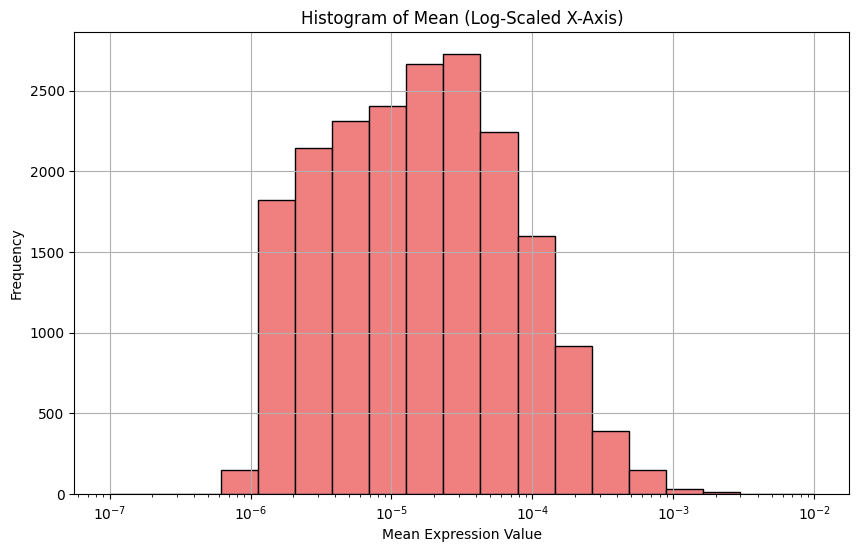

In [17]:
# Plot histograms for mean expression ratio with log-scaled x-axis and custom bins
print("Histogram for Mean Expression Ratio (Log-Scaled X-Axis with Custom Bins):")
plot_histogram_with_custom_bins(gene_stats, 'Mean', bins=mean_bins)

In [10]:
# Generate logarithmic bins from 1e-10 to 1e-7 to capture the range of Variance values
variance_bins = np.logspace(-12, -4, num=20)

Histogram for Variance (Log-Scaled X-Axis with Custom Bins):


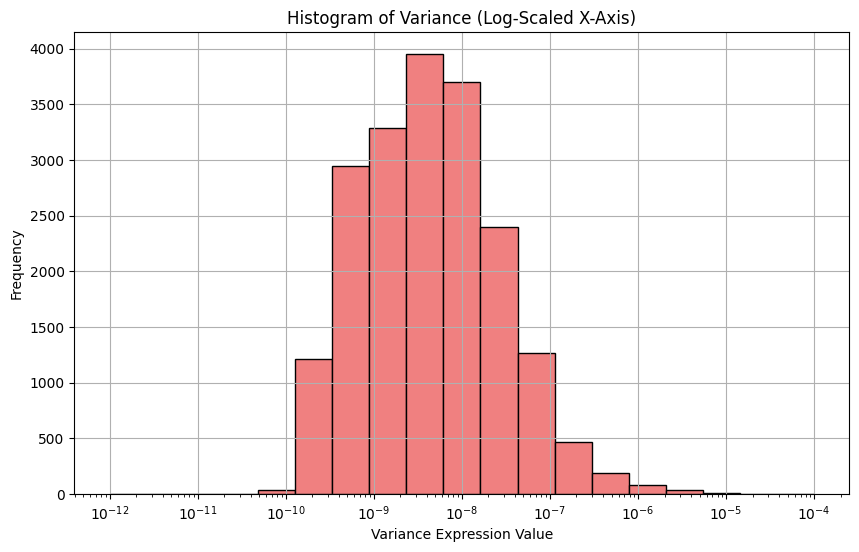

In [11]:
# Plot histograms for variance expression ratio with log-scaled x-axis and custom bins
print("Histogram for Variance (Log-Scaled X-Axis with Custom Bins):")
plot_histogram_with_custom_bins(gene_stats, 'Variance', bins=variance_bins)